In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression on California Test Scores

**1.**Find the url for the California Test Score Data Set from the following website:
https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" fle to understand the variables in the dataset, then use the following url to import the data.

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target data (i.e. the dependent variable) is named "testscr". You can use all variables in the data except for "readscr" and "mathscr" in the following analysis. (These two variables were used to generate the dependent variable).

In [2]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

**1.1** Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.

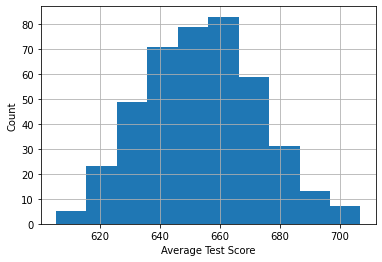

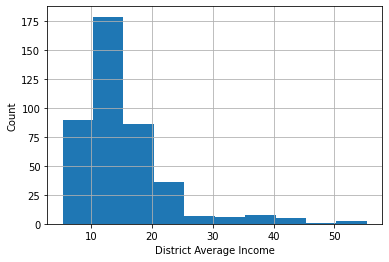

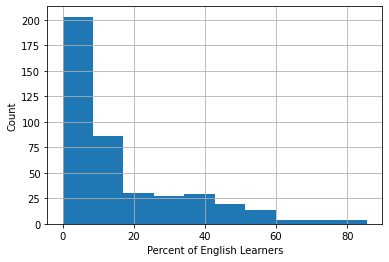

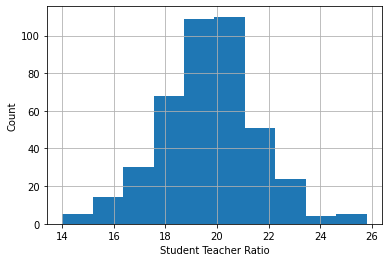

In [3]:
df['testscr'].hist()
plt.xlabel('Average Test Score')
plt.ylabel('Count')
plt.show()

df['avginc'].hist()
plt.xlabel('District Average Income')
plt.ylabel('Count')
plt.show()

df['elpct'].hist()
plt.xlabel('Percent of English Learners')
plt.ylabel('Count')
plt.show()

df['str'].hist()
plt.xlabel('Student Teacher Ratio')
plt.ylabel('Count')
plt.show()

**1.2** Visualize the dependency of the target on each feature from 1.1.

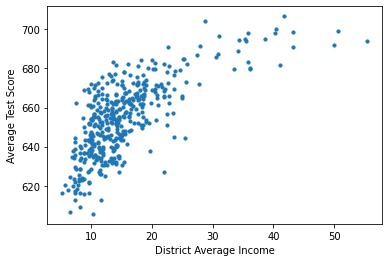

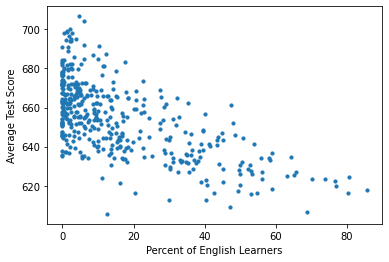

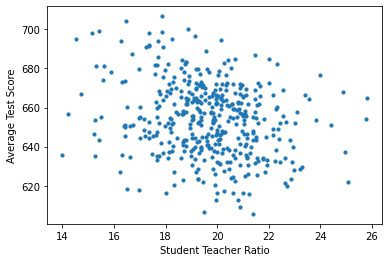

In [4]:
plt.scatter(df['avginc'], df['testscr'], s = 10.)
plt.xlabel("District Average Income")
plt.ylabel("Average Test Score")
plt.show()

plt.scatter(df['elpct'], df['testscr'], s = 10.)
plt.xlabel("Percent of English Learners")
plt.ylabel("Average Test Score")
plt.show()

plt.scatter(df['str'], df['testscr'], s = 10.)
plt.xlabel("Student Teacher Ratio")
plt.ylabel("Average Test Score")
plt.show()

**1.3** Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [5]:
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [6]:
data = df.copy()
data.drop(['distcod','county','district','grspan','Unnamed: 0','readscr', 'mathscr'], axis = 1, inplace = True)
data.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


In [7]:
y = data['testscr']
X = data.loc[:, data.columns != 'testscr']
# Split data in training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Data Scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

- KNN

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from statistics import mean

# KNN with unscaled data
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(KNeighborsRegressor(), X_train, y_train))))
print("Test score:{:.3f}".format(knn.score(X_test, y_test)))

# KNN with scaled the data
knn1 = KNeighborsRegressor()
knn1.fit(X_train_scaled, y_train)
print("\n")
print("Train score:{:.3f}".format(
mean(cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train))))
print("Test score:{:.3f}".format(knn1.score(X_test_scaled, y_test)))

Train score:-0.054
Test score:0.085


Train score:0.711
Test score:0.769


Scaling data helps a lot in the KNN model! The test score changes from 0.085 to 0.769 here.

---



- Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

# Linear Regression with unscaled data
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(LinearRegression(), X_train, y_train))))
print("Test score: {:.3f}".format(lr.score(X_test, y_test)))

# Linear Regression with scaled the data
lr1 = LinearRegression()
lr1.fit(X_train_scaled, y_train)
print("\n")
print("Train score:{:.3f}".format(
mean(cross_val_score(LinearRegression(), X_train_scaled, y_train))))
print("Test score: {:.5f}".format(lr1.score(X_test_scaled, y_test)))

Train score:0.781
Test score: 0.807


Train score:0.781
Test score: 0.80702


Scaling data doesn't help much in linear regression. The test score and the train score nearly don't change.

- Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

# Ridge Regression with unscaled data
ridge = Ridge().fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(Ridge(), X_train, y_train))))
print("Test score: {:.3f}".format(ridge.score(X_test, y_test)))

# Ridge Regression with scaled data
ridge1 = Ridge().fit(X_train_scaled, y_train)
print("\n")
print("Train score:{:.3f}".format(
mean(cross_val_score(Ridge(), X_train_scaled, y_train))))
print("Test score: {:.5f}".format(ridge1.score(X_test_scaled, y_test)))

Train score:0.783
Test score: 0.807


Train score:0.783
Test score: 0.80697


Scaling data doesn't help much in ridge regression. The test score and the train score nearly don't change.

- Lasso Regression

In [11]:
from sklearn.linear_model import Lasso

# Lasso Regression with unscaled data
lasso = Lasso().fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(Lasso(), X_train, y_train))))
print("Test score: {:.3f}".format(lasso.score(X_test, y_test)))

# Lasso Regression with scaled data
lasso1 = Lasso().fit(X_train_scaled, y_train)
print("\n")
print("Train score:{:.3f}".format(
mean(cross_val_score(Lasso(), X_train_scaled, y_train))))
print("Test score: {:.3f}".format(lasso1.score(X_test_scaled, y_test)))

Train score:0.787
Test score: 0.807


Train score:0.784
Test score: 0.786


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.32371148919992, tolerance: 10.135477633342422
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.776310905559512, tolerance: 7.975809273265566
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1451.5511712081152, tolerance: 7.8882868917286695
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2799.691

The score in Lasso regression with scaled data is a little bit lower than the regression with unscaled data. 

**1.4** Tune the parameters of the models where possible using GridSearchCV. Do
the results improve?

In [13]:
# Here all models used scaled data
from sklearn.model_selection import GridSearchCV
# KNN with GridSearchCV
param_grid1 = {'n_neighbors': np.arange(1, 20, 2)}
grid1 = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid1, cv=5)
grid1.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid1.best_score_))
print("best parameters: {}".format(grid1.best_params_))
print("test-set score: {:.3f}".format(grid1.score(X_test_scaled, y_test)))
# Ridge with GridSearchCV
param_grid2 = {'alpha': np.arange(0.1, 30, 0.1)}
grid2 = GridSearchCV(Ridge(), param_grid = param_grid2, cv = 5)
grid2.fit(X_train_scaled, y_train)
print("\n")
print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))
print("test-set score: {:.3f}".format(grid2.score(X_test_scaled, y_test)))
# Lasso with GridSearchCV
param_grid3 = {'alpha': np.arange(0.1, 20, 0.1)}
grid3 = GridSearchCV(Lasso(), param_grid = param_grid3, cv = 5)
grid3.fit(X_train_scaled, y_train)
print("\n")
print("best mean cross-validation score: {:.3f}".format(grid3.best_score_))
print("best parameters: {}".format(grid3.best_params_))
print("test-set score: {:.3f}".format(grid3.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.720
best parameters: {'n_neighbors': 11}
test-set score: 0.770


best mean cross-validation score: 0.786
best parameters: {'alpha': 16.700000000000003}
test-set score: 0.802


best mean cross-validation score: 0.788
best parameters: {'alpha': 0.4}
test-set score: 0.800


For KNN, the test set score is nearly the same without tuning;
for Ridge, the test set score(0.802) is a little bit lower than the untuned one(0.807);
for Lasso, the test set score(0.800) is little higher than the untuned one(0.786)

**1.5** Compare the coefficients of your two best linear models (not knn), do they 
agree on which features are important?

In [14]:
print("ridge.coef_: {}".format(ridge1.coef_))
print("linear.coef_: {}".format(lr1.coef_))

ridge.coef_: [ 0.07269491 -0.92810378 -1.24237127 -9.65603891  0.94468825 -0.08099605
  1.15706149 -0.63971526  3.7388452  -3.52255519]
linear.coef_: [ 0.99068803 -1.93639614 -1.17333052 -9.77646224  1.04183669 -0.09712146
  1.15380605 -0.67884963  3.71960199 -3.4784803 ]


- The coefficients of these two models have some differences in 'enrltot' and 'teachers', but don't have significant difference in the rest variables.
- 'mealpct' has the most negtive influence on 'testscr' while 'avginc' has the most possitive impact. 

**1.6** Discuss which final model you would choose to predict new data

I would choose the ridge regression model with scaled data in default setting. There isn't a big difference between the test score of the two models. But the shrink effect is obvious in ridge model comparing the 'enrltot' and 'teachers' coefficients. So, it is possible there exists multicollinearity in those explanatory varables and ridge model can help overcome this.